# Metody redukcji wymiarów

Czasami do przeprowadzenia uczenia jakiegoś modelu jest zbyt wiele zmiennych. Dostrzegamy występujące tam korelacje, ale sami nie chcemy ich wprost analizować. Lub przeciwnie, posiadamy mnogość danych, które z punktu widzenia postrzegania danych niczym istotnym się niewyróżniają, np. piksele na obrazie.

Podstawowa matematyczne koncepcja naprawiająca tę sytuację polega na zmianie sposoby reprezentowania danych poprzez przejść to innej bazy. Takiej bazy, w której istotne cechy podlegają uwypukleniu. 

Dostępnych jest tu kilka algorytmów pośród których warto wyszczególnić

* PCA - Analizę głównych składowych
* LDA - Liniową analizę dyskryminacyjną
* FA - Analizę czynnikową
* CA - Analiza korespondencji

## PCA

Najpierw zaimoprtujmy zestaw danych 

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Dalej zaprezentujmy jak wykorzystać implementacje sklearn algorytmu PCA

In [16]:
from sklearn.decomposition import PCA

ilosc_glownych_skladowych = 1

pca = PCA(n_components=ilosc_glownych_skladowych)

pca.fit(iris.data)
X_pca = pca.transform(X)
X_pca.shape


(150, 1)

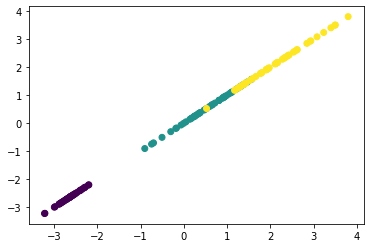

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 0], c=y, marker='o')
plt.show()

Jak widać dzięki temu zabiegowi można by wykorzystać nawet zwykłą regresję logistyczną do bardzo skutecznej klasyfikacji. Podstawową charakterystyką dekompozycji jest procentowy udział wariancji po przekształceniu. Można sprawdzić czy obecnie rozważana dekompozycja posiada większość cennej informacji.

In [19]:
pca.explained_variance_ratio_.sum()

0.9246187232017271

## Analiza czynników

Kolejnym algorytmem jest analiza czynników.

In [6]:
from sklearn.decomposition import FactorAnalysis as FA

ilosc_czynnikow = 2

fa = FA(n_components=ilosc_czynnikow)
fa.fit(iris.data)
X_fa = fa.transform(X)
X_fa.shape


(150, 2)

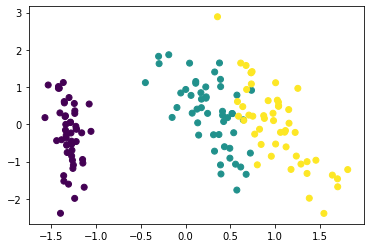

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, marker='o')
plt.show()

## LDA

Jednym z najciekawszych algorytmów jest analiza dyskryminacyjna. Jako jedyna z omawianych tu algorytmów ma charakter nadzorowanych, czyli wydatnie korzysta z pwektora odpowiedzi. Co czyni ją szczególnie wydajną w redukcji na potrzeby klasyfikacji.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

liczba_dyskryminant = 2

lda = LDA(n_components=liczba_dyskryminant)
lda.fit(X, y)
X_lda = lda.transform(X)

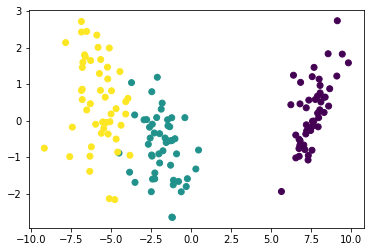

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, marker='o')
plt.show()


## Analiza korespondencji

Analiza korespondencji jest jeszcze jednym ciekawym algorytmem.

In [10]:
from sklearn.cross_decomposition import CCA 

liczba_skladowych = 2

Y = [[i] for i in y]

cca = CCA(n_components=liczba_skladowych)
cca.fit(X, Y)
X_cca = cca.transform(X)
X_cca.shape

/home/dyschemist/Dokumenty/dydaktyka/wielowymiarowa analiza danych/2019/jupyter/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


(150, 2)

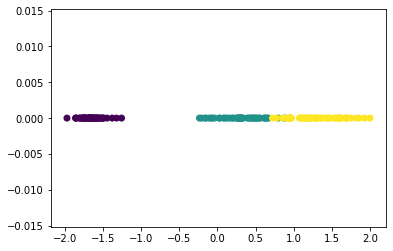

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_cca[:, 0], X_cca[:, 1], c=y, marker='o')
plt.show()